# 1. 二分类信息熵和基尼系数

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def entropy(p):
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

In [4]:
def gini(p):
    return 1 - p ** 2 - (1 - p) ** 2

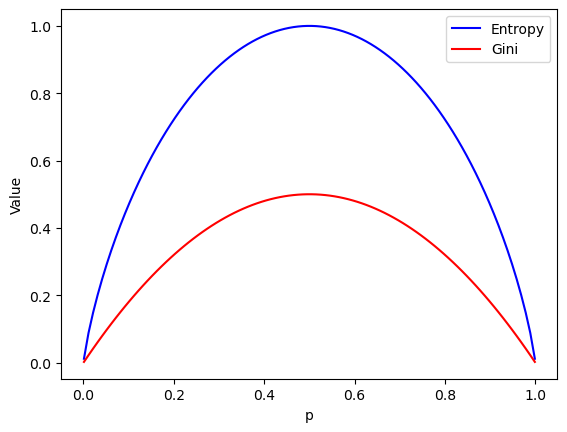

In [23]:
plot_x = np.linspace(0.001, 0.999, 100)
plt.plot(plot_x, entropy(plot_x), color = 'blue')
plt.plot(plot_x, gini(plot_x), color = 'red')
plt.legend(['Entropy', 'Gini'])
plt.xlabel('p')
plt.ylabel('Value')
plt.show()

# 2. 数据集

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:, 1:3]
y = iris.target

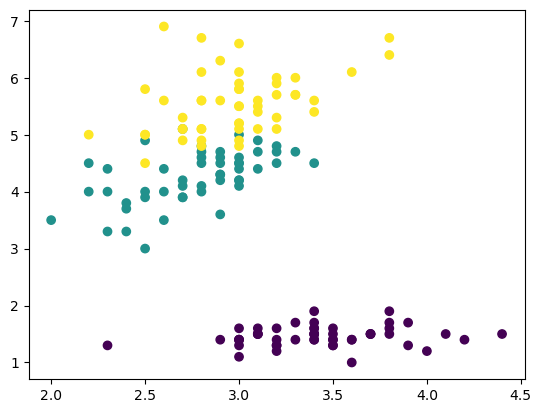

In [7]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

# 3. sklearn中的决策树

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
clf.fit(x, y)

DecisionTreeClassifier(max_depth=2)

In [10]:
def decision_boundary_plot(X, y, clf):
    axis_x1_min, axis_x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    axis_x2_min, axis_x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    x1, x2 = np.meshgrid( np.arange(axis_x1_min,axis_x1_max, 0.01) , np.arange(axis_x2_min,axis_x2_max, 0.01))
    z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z = z.reshape(x1.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F5B9EF','#BBFFBB','#F9F9CB'])

    plt.contourf(x1, x2, z, cmap=custom_cmap)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

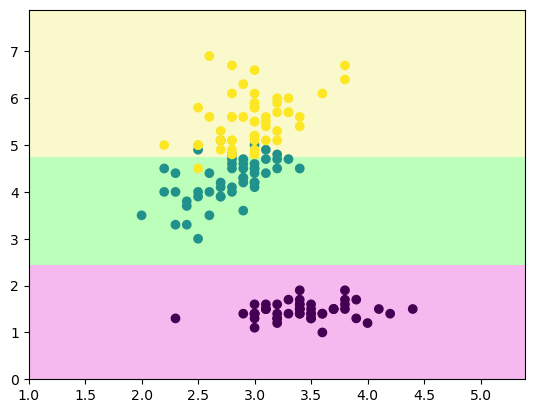

In [11]:
decision_boundary_plot(x, y, clf)

[Text(0.4, 0.8333333333333334, 'x[1] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 4.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.043\nsamples = 45\nvalue = [0, 44, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.194\nsamples = 55\nvalue = [0, 6, 49]')]

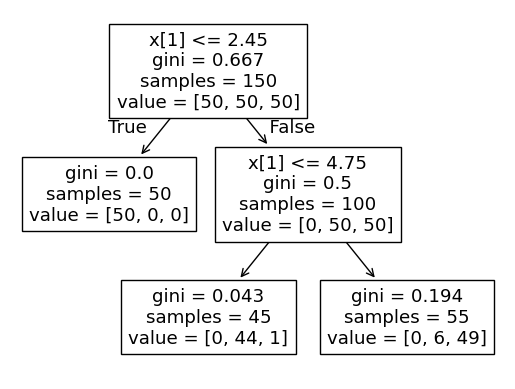

In [12]:
from sklearn.tree import plot_tree
plot_tree(clf)

# 4. 最优划分条件

In [13]:
from collections import Counter
Counter(y)

Counter({np.int64(0): 50, np.int64(1): 50, np.int64(2): 50})

In [14]:
def calc_entropy(y):
    counter = Counter(y)
    sum_ent = 0
    for i in counter:
        p = counter[i] / len(y)
        sum_ent += (-p * np.log2(p))
    return sum_ent

In [15]:
calc_entropy(y)

np.float64(1.584962500721156)

In [16]:
def calc_gini(y):
    counter = Counter(y)
    sum_gini = 1
    for i in counter:
        p = counter[i] / len(y)
        sum_gini -= (p ** 2)
    return sum_gini

In [17]:
calc_gini(y)

0.6666666666666665

In [18]:
def split_dataset(x, y, dim, value):
    index_left = (x[:, dim] <= value)
    index_right = (x[:, dim] > value)
    return x[index_left], y[index_left], x[index_right], y[index_right]

In [19]:
def find_best_split(x, y):
    best_dim = -1
    best_value = -1
    best_gini = np.inf
    best_gini_left, best_gini_right = -1, -1
    for dim in range(x.shape[1]):
        sorted_index = np.argsort(x[:, dim])
        for i in range(x.shape[0] - 1):
            value_left, value_right = x[sorted_index[i], dim], x[sorted_index[i + 1], dim]
            if value_left != value_right:
                value = (value_left + value_right) / 2
                x_left, y_left, x_right, y_right = split_dataset(x, y, dim, value)
                gini_left, gini_right = calc_gini(y_left), calc_gini(y_right)
                gini = (len(x_left) * gini_left + len(x_right) * gini_right) / x.shape[0]
                if gini < best_gini:
                    best_dim = dim
                    best_value = value
                    best_gini = gini
                    best_gini_left, best_gini_right = gini_left, gini_right
    return best_dim, best_value, best_gini, best_gini_left, best_gini_right
            

In [20]:
find_best_split(x, y)

(1, np.float64(2.45), 0.3333333333333333, 0.0, 0.5)

In [21]:
x_left, y_left, x_right, y_right = split_dataset(x, y, 1, 2.45)

In [22]:
find_best_split(x_right, y_right)

(1,
 np.float64(4.75),
 0.12646464646464653,
 0.04345679012345684,
 0.19438016528925628)